# 2023-08-24_Template

**Author**:  Y.M. Guo

**Create Date**： 2023-5-11



**Version**: V1.0

**Log**:



**Reference**:

**Supporting Material(attachments)**: 

### 0. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil as sh       #复制文件
from datetime import datetime
import os

def read_mumax3_table(filename):
    """Puts the mumax3 output table in a pandas dataframe"""

    from pandas import read_table
    
    table = read_table(filename)
    table.columns = ' '.join(table.columns).split()[1::2]
    
    return table

def read_mumax3_ovffiles(outputdir):
    """Load all ovffiles in outputdir into a dictionary of numpy arrays 
    with the ovffilename (without extension) as key"""
    
    from subprocess import run, PIPE, STDOUT
    from glob import glob
    from os import path
    from numpy import load

    # convert all ovf files in the output directory to numpy files
    os.system("/usr/local/go/bin/mumax3-convert -numpy "+outputdir+"/*.ovf")
    #p = run(["/usr/local/go/bin/mumax3-convert","-numpy",+"/*.ovf"], stdout=PIPE, stderr=STDOUT)
    #if p.returncode != 0:
        #print(p.stdout.decode('UTF-8'))

    # read the numpy files (the converted ovf files)
    fields = {}
    for npyfile in glob(outputdir+"/*.npy"):
        key = path.splitext(path.basename(npyfile))[0]
        fields[key] = load(npyfile)
    
    return fields

def run_mumax3(script, name, verbose=False):
    """ Executes a mumax3 script and convert ovf files to numpy files
    
    Parameters
    ----------
      script:  string containing the mumax3 input script
      name:    name of the simulation (this will be the name of the script and output dir)
      verbose: print stdout of mumax3 when it is finished
    """
    
    from subprocess import run, PIPE, STDOUT
    from os import path

    scriptfile = name + ".txt" 
    outputdir  = name + ".out"

    # write the input script in scriptfile
    with open(scriptfile, 'w' ) as f:
        f.write(script)
    
    # call mumax3 to execute this script
    os.system('/usr/local/go/bin/mumax3 -f -http ":6006" '+scriptfile)
    #p = run(['/usr/local/go/bin/mumax3','-f','-http ":6006"',scriptfile], stdout=PIPE, stderr=STDOUT)
    #if verbose or p.returncode != 0:
        #print(p.stdout.decode('UTF-8'))
        
    if path.exists(outputdir + "/table.txt"):
        table = read_mumax3_table(outputdir + "/table.txt")
    else:
        table = None
        
    fields = read_mumax3_ovffiles(outputdir)
    
    print("程序正在运行中")
    
    return table, fields

def generate_script(script, name, verbose=False):
    """ Executes a mumax3 script and convert ovf files to numpy files
    
    Parameters
    ----------
      script:  string containing the mumax3 input script
      name:    name of the simulation (this will be the name of the script and output dir)
      verbose: print stdout of mumax3 when it is finished
    """
    
    from subprocess import run, PIPE, STDOUT
    from os import path

    scriptfile = name + ".txt" 
    outputdir  = name + ".out"

    # write the input script in scriptfile
    with open(scriptfile, 'w' ) as f:
        f.write(script)

In [2]:
script=f"""
//Specify output format
OutputFormat = OVF2_TEXT

setgridsize(30,30,2) //area of free layer=900nm2
setcellsize(1e-9,1e-9,0.5e-9)
setpbc(0,0,0)

//setregion



Msat = 1e6 //1000emu/cm^3=10e6A/m
Aex = 15e-12
Ku1 = 2e6 //efective perpendicular anisotropy constant 
//K = 2e6 erg/cm  1st order uniaxial anisotropy constant (J/m3)
AnisU = vector(0,0,1) // z-direction
alpha = 0.005 //Gilbert damping alpha = 0.005
m=uniform(0,0,-1)

Bdc :=0.03   //External magnetic feld 300Oe on x direction
//Static field
B_ext = vector(Bdc, 0, 0)

relax()

//Add SOT
// Define constants
AlphaH := 0.3 //AlphaH equal to the theta jD
SOTxi:=0
Pol = AlphaH
Lambda=1
Epsilonprime = alphaH/2 * SOTxi
Fixedlayer = vector(0,-1,0) // p
J=vector(0,0,0)
autosave(m,1e-10)
tableAutosave(1e-11)
tableAdd(m)
run(0.5e-9)
J=vector(0,0,abs(15*1e11))
autosave(m,1e-10)
tableAutosave(1e-11)
run(5*1e-9)
J=vector(0,0,0)
autosave(m,1e-10)
tableAutosave(1e-11)
run(10e-9)
"""


In [ ]:
scriptname = "SOT-SJTU4-1d5e12A-t1nm"
table, fields = run_mumax3(script,scriptname)
np.save(scriptname,fields)
print("程序运行结束")

//mumax 3.10 [linux_amd64 go1.21.4(gc) CUDA-12.3]
//GPU info: NVIDIA GeForce RTX 3090(24268MB), CUDA Driver 11.7, cc=8.6, using cc=75 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: SOT-SJTU4-1d5e12A-t1nm.out/
//starting GUI at http://127.0.0.1:6006
OutputFormat = OVF2_TEXT
setgridsize(30, 30, 2)
setcellsize(1e-9, 1e-9, 0.5e-9)
setpbc(0, 0, 0)
//resizing...
// Initializing geometry 1 %
// Initializing geometry 100 %
Msat = 1e6
Aex = 15e-12
Ku1 = 2e5
AnisU = vector(0, 0, 1)
alpha = 0.005
m = uniform(0, 0, -1)
Bdc := 0.03
B_ext = vector(Bdc, 0, 0)
relax()


//Using cached kernel: /tmp/mumax3kernel_[30 30 2]_[0 0 0]_[1e-09 1e-09 5e-10]_6_


AlphaH := 0.3
SOTxi := -2
Pol = AlphaH
Lambda = 1
Epsilonprime = alphaH / 2 * SOTxi
Fixedlayer = vector(0, -1, 0)
J = vector(0, 0, 0)
autosave(m, 1e-10)
tableAutosave(1e-11)
tableAdd(m)
run(0.5e-9)
J = vector(0, 0, abs(15*1e11))
autosave(m, 1e-10)
tableAutosave(1e-11)
run(5 * 1e-9)


                 t        mx            my        mz        mx            my  \
0     0.000000e+00  0.059527  2.690487e-11 -0.998222  0.059527  2.690487e-11   
1     1.001012e-11  0.059529  4.389830e-06 -0.998222  0.059529  4.389830e-06   
2     2.001692e-11  0.059534  5.539622e-06 -0.998221  0.059534  5.539622e-06   
3     3.000750e-11  0.059538  2.661936e-06 -0.998221  0.059538  2.661936e-06   
4     4.000652e-11  0.059538 -2.132871e-06 -0.998221  0.059538 -2.132871e-06   
...            ...       ...           ...       ...       ...           ...   
1548  1.546002e-08 -0.008273  6.623028e-02  0.997745 -0.008273  6.623028e-02   
1549  1.547001e-08 -0.034270 -1.027242e-02  0.999341 -0.034270 -1.027242e-02   
1550  1.548001e-08  0.008091 -7.861706e-02  0.996844  0.008091 -7.861706e-02   
1551  1.549001e-08  0.087139 -8.936746e-02  0.992136  0.087139 -8.936746e-02   
1552  1.550000e-08  0.145449 -3.592221e-02  0.988658  0.145449 -3.592221e-02   

            mz  
0    -0.998222  
1    

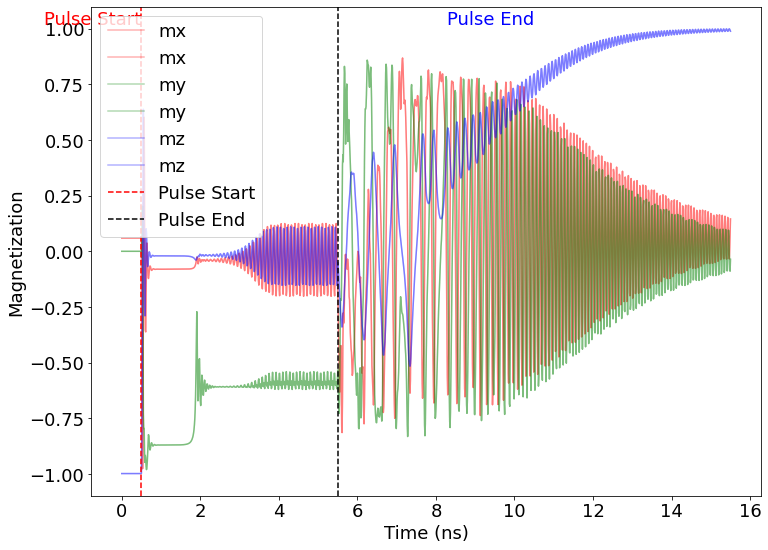

In [8]:
print(table)

plt.figure()
plt.rcParams.update({'font.size': 18})
nanosecond = 1e-9
plt.plot( table["t"]/nanosecond, table["mx"],'r',alpha=0.3,label='mx')
plt.plot( table["t"]/nanosecond, table["my"],'g',alpha=0.3,label='my')
plt.plot( table["t"]/nanosecond, table["mz"],'b',alpha=0.3,label='mz')

plt.xlabel("Time (ns)")
plt.ylabel("Magnetization")
# 绘制垂直虚线，用于标记不同的时间点
plt.axvline(x=0.5, color='red', linestyle='--', label='Pulse Start')
plt.axvline(x=5.5, color='black', linestyle='--', label='Pulse End')
plt.text(0.5, 1, 'Pulse Start', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.text(10.5, 1, 'Pulse End', color='blue', verticalalignment='bottom', horizontalalignment='right')
plt.legend()
plt.gcf().set_size_inches(12, 9)
plt.savefig(scriptname+'.svg', format='svg')
plt.show()

In [ ]:
//Absorbing regions on both sides
//Left
defregion(24,xrange(-22e-6,-21e-6))
alpha.setregion(24,1e-2)
defregion(25,xrange(-23e-6,-22e-6))
alpha.setregion(25,5e-2)
defregion(26,xrange(-24e-6,-23e-6))
alpha.setregion(26,1e-1)
defregion(27,xrange(-Inf,-24e-6))
alpha.setregion(27,0.5)
//right
defregion(14,xrange(21e-6,22e-6))
alpha.setregion(14,5e-2)
defregion(15,xrange(22e-6,23e-6))
alpha.setregion(15,5e-2)
defregion(16,xrange(23e-6,24e-6))
alpha.setregion(16,1e-1)
defregion(17,xrange(24e-6,Inf))
alpha.setregion(17,0.5)